In [1]:
import seaborn_plot_util
%matplotlib notebook
import re
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import sys
from scipy import stats
import seaborn_plot_util
import pprint
import json
import os
from pathlib import Path
import util

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

nlp = spacy.load("en_core_web_md")

/home/madhu/liwc_code/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:

# def compute_dataset_length(data):

#     data_filepath = data["data_filepath"]
#     all_reviews = []
    
#     with open(data_filepath, "r") as fin:
#         for line in fin:
#             all_reviews.append(line.strip("\n"))

#         n_samples = None

#         if "n_samples" in data:
#             n_samples = data["n_samples"]
#         else:
#             n_samples = len(all_reviews)

#         if n_samples == None:
#             n_samples = len(all_reviews)

#         indices = np.random.choice(np.arange(len(all_reviews)), size=n_samples)
#         selected_reviews = [all_reviews[idx] for idx in indices]
        
#         analysis_data = []
#         for rev in selected_reviews:
#             doc = nlp(rev)             
#             token_count = len(doc)            
#             sent_count = 0
#             for sent in doc.sents:  
#                 sent_count += 1

#             analysis_data.append({
#                 "token_count": token_count,
#                 "sent_count": sent_count,
#                 "review": rev
#             })
#         token_count_review_level = list(map(lambda x:x['token_count'], analysis_data))
#         token_count_sent_level = list(map(lambda x:1.0*x['token_count']/x["sent_count"], analysis_data))        

#         return token_count_review_level, token_count_sent_level    

In [11]:
seed_val = 23
np.random.seed(seed_val)

saves_dir = os.path.join("../saves", "dataset_length")
Path(saves_dir).mkdir(parents=True, exist_ok=True)       
preload_flag = True
plot_data={
    "sent_level": [],
    "review_level": []
}
analysis_types = list(plot_data.keys())
plot_save_prefix = "dataset_length_dist"

if not preload_flag:
    datasets = json.loads(open("input.json", "r").read())
    for data in datasets:
        myprint(data)        
        token_count = {}
        token_count["review_level"], token_count["sent_level"] = compute_dataset_length(data["positive"])       

        for a_type in analysis_types:
            plot_data[a_type].append({
                "category": "positive reviews",
                "name": data["name"],
                "value": np.mean(token_count[a_type]),
                "sem_value": stats.sem(token_count[a_type]),
                "all_samples_data": token_count[a_type]
            })
        token_count = {}
        token_count["review_level"], token_count["sent_level"] = compute_dataset_length(data["negative"])

        for a_type in analysis_types:
            plot_data[a_type].append({
                "category": "negative reviews",
                "name": data["name"],
                "value": np.mean(token_count[a_type]),
                "sem_value": stats.sem(token_count[a_type]),
                "all_samples_data": token_count[a_type]
            })

        print()
        print()

    pickle.dump({
        "plot_data": plot_data
    }, open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "wb"))
else:
    plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))["plot_data"]
    # plot_data = {
    #     "sent_level": temp_json["plot_data_sent_level"],
    #     "review_level": temp_json["plot_data_review_level"]
    # }



In [ ]:
# plot_data_amz, plot_data_non_amz = util.filter_amazon(plot_data["review_level"])

# ylim_top = max([float(d["value"]) for d in plot_data_non_amz])
# ylim_top = 1.2*ylim_top

In [7]:
from importlib import reload


../saves/dataset_length/dataset_length_dist_review_level_amz


<IPython.core.display.Javascript object>


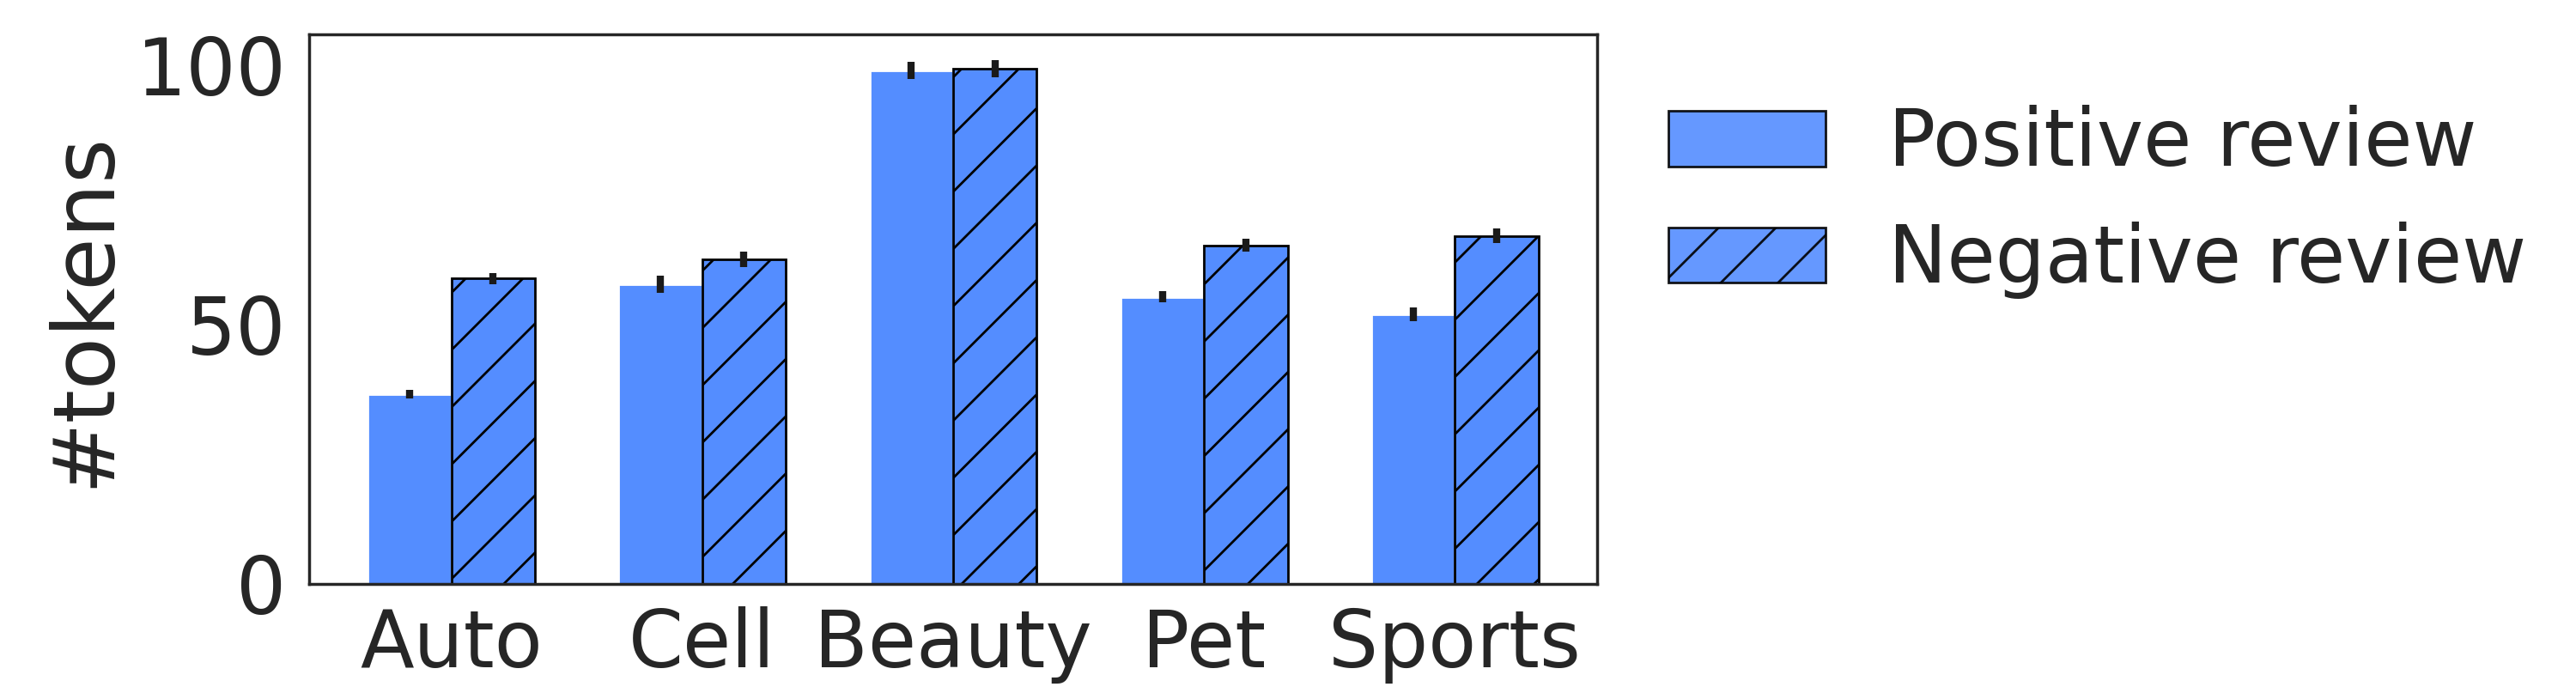

../saves/dataset_length/dataset_length_dist_review_level_non_amz


<IPython.core.display.Javascript object>


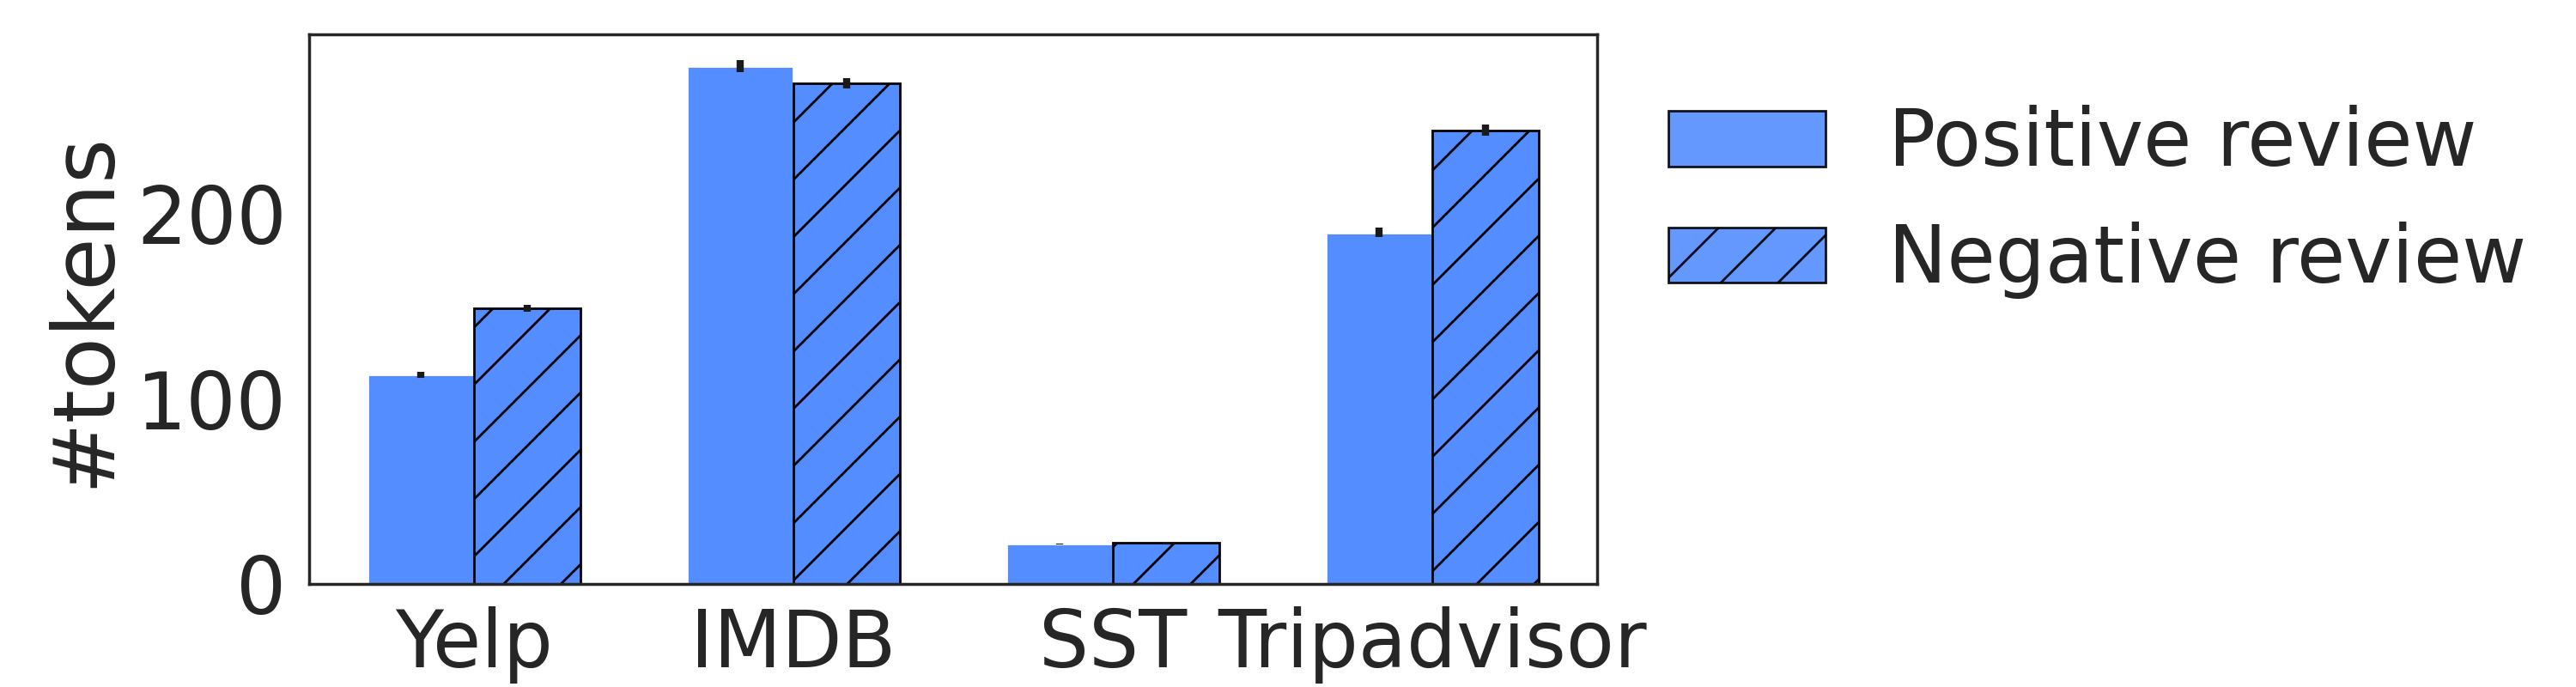

In [15]:
reload(seaborn_plot_util)

for a_type in analysis_types[1:]:
    plot_data_amz, plot_data_non_amz = util.filter_amazon(plot_data[a_type])
    
    seaborn_plot_util.draw_grouped_barplot(plot_data_amz, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+a_type+"_amz"),
        figsize=(15, 4), 
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=True)
    
    
    seaborn_plot_util.draw_grouped_barplot(plot_data_non_amz, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+a_type+"_non_amz"),
        figsize=(15, 4), 
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
        amazon_data_flag=False)
    

In [46]:
plot_data_amz

[{'category': 'positive reviews',
  'name': 'Cellphones',
  'value': 10.207674668056265,
  'sem_value': 0.08980923722635242,
  'all_samples_data': [14.0,
   7.0,
   3.0,
   21.0,
   14.0,
   11.0,
   17.11111111111111,
   17.25,
   11.6,
   10.75,
   2.0,
   1.0,
   15.5,
   7.666666666666667,
   18.0,
   7.588235294117647,
   12.0,
   10.0,
   14.6,
   14.0,
   2.0,
   5.0,
   14.0,
   4.0,
   14.0,
   2.0,
   9.666666666666666,
   11.777777777777779,
   15.0,
   9.333333333333334,
   19.0,
   4.0,
   14.666666666666666,
   9.0,
   15.23076923076923,
   6.0,
   23.0,
   12.75,
   1.0,
   1.0,
   1.0,
   14.333333333333334,
   5.5,
   8.5,
   34.0,
   5.0,
   5.0,
   7.0,
   6.5,
   8.0,
   9.0,
   4.0,
   11.285714285714286,
   10.26086956521739,
   16.6,
   12.4,
   24.235294117647058,
   7.0,
   3.0,
   4.0,
   2.0,
   12.0,
   12.666666666666666,
   20.0,
   9.0,
   1.0,
   17.0,
   2.0,
   5.5,
   6.333333333333333,
   6.5,
   2.0,
   3.5,
   9.0,
   11.5,
   3.0,
   10.5,
   2.0,

../saves/dataset_length/dataset_length_dist_sent_level_amz


/home/madhu/liwc_code/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


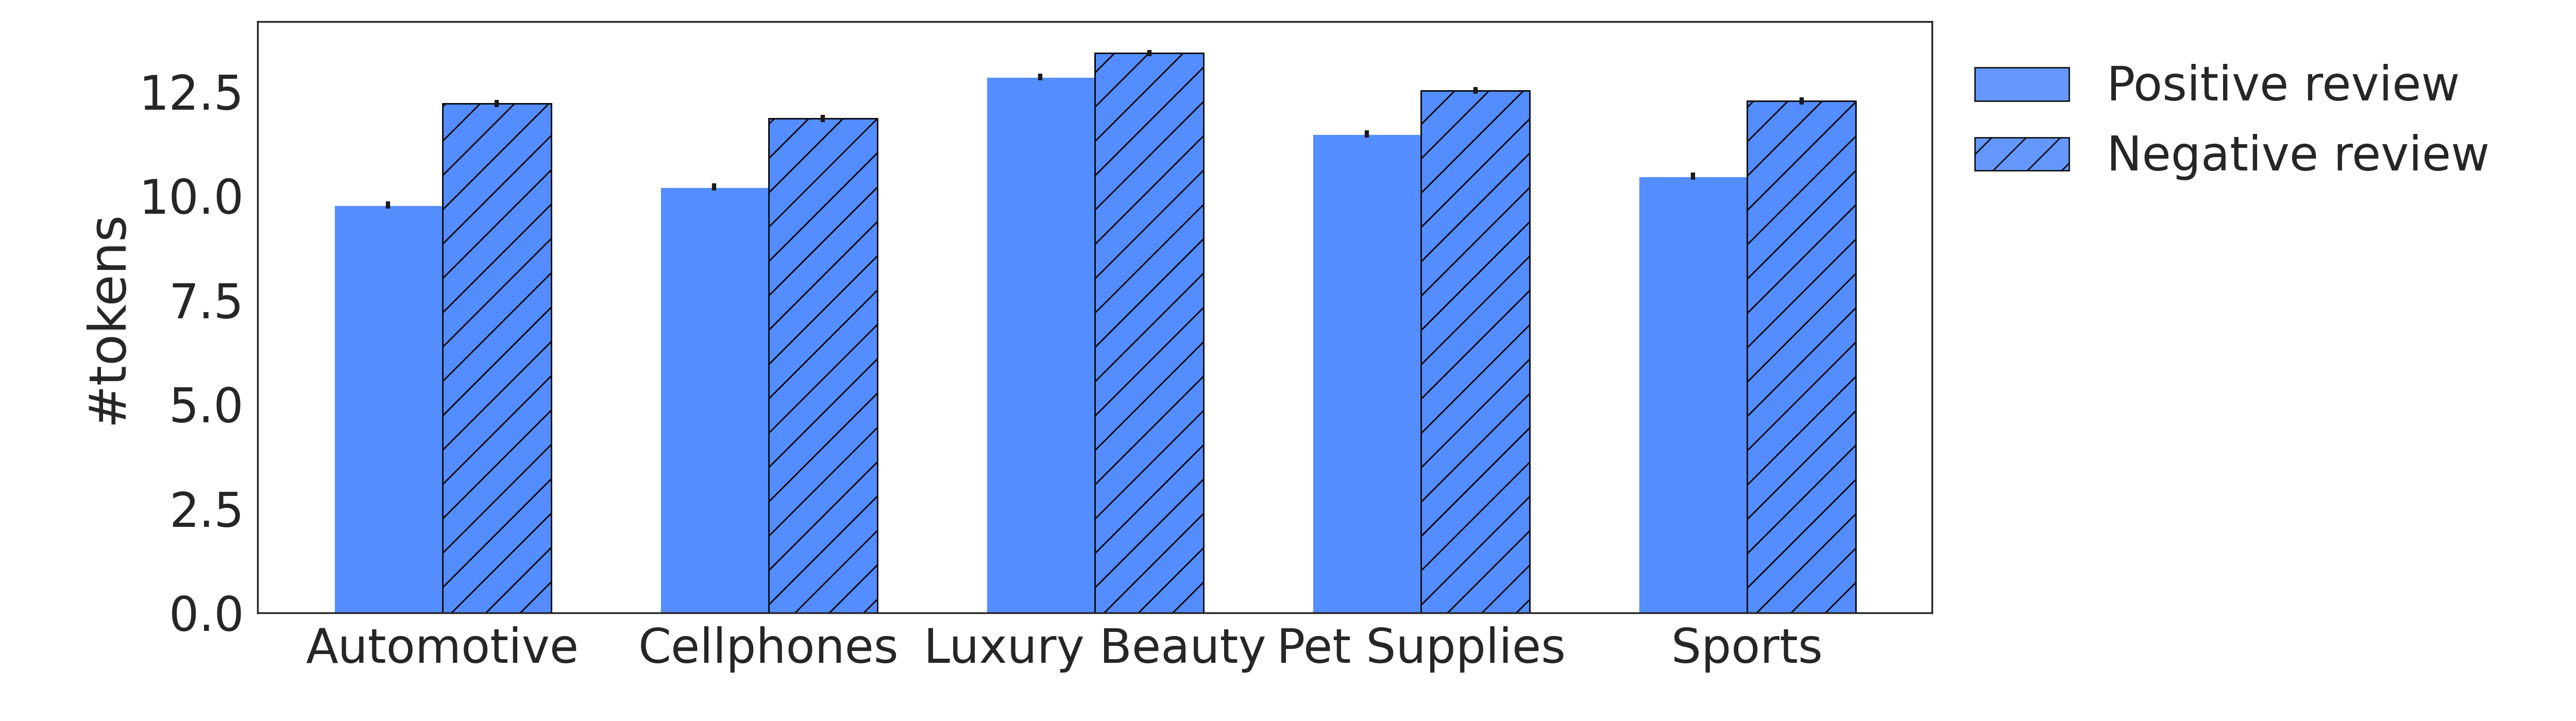

data_df             name      value  sem_value          category
4  Automotive     9.776174   0.090492   positive reviews
5  Automotive     12.208955  0.089511   negative reviews
0  Cellphones     10.207675  0.089809   positive reviews
1  Cellphones     11.853364  0.086042   negative reviews
6  Luxury Beauty  12.844339  0.083878   positive reviews
7  Luxury Beauty  13.418718  0.075970   negative reviews
2  Pet Supplies   11.476551  0.085013   positive reviews
3  Pet Supplies   12.520594  0.080310   negative reviews
8  Sports         10.470123  0.087334   positive reviews
9  Sports         12.269086  0.081111   negative reviews


In [138]:
reload(seaborn_plot_util)

ylim_top = max([float(d["value"]) for d in plot_data_amz])
ylim_top = 1.2*ylim_top

seaborn_plot_util.draw_grouped_barplot(plot_data_amz, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+a_type+"_amz"),
        figsize=(25, 7), position=(0.1, 0.15, 0.65, 0.82),
#         ylim_top=ylim_top,
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), amazon_data_flag=True)


../saves/dataset_length/dataset_length_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


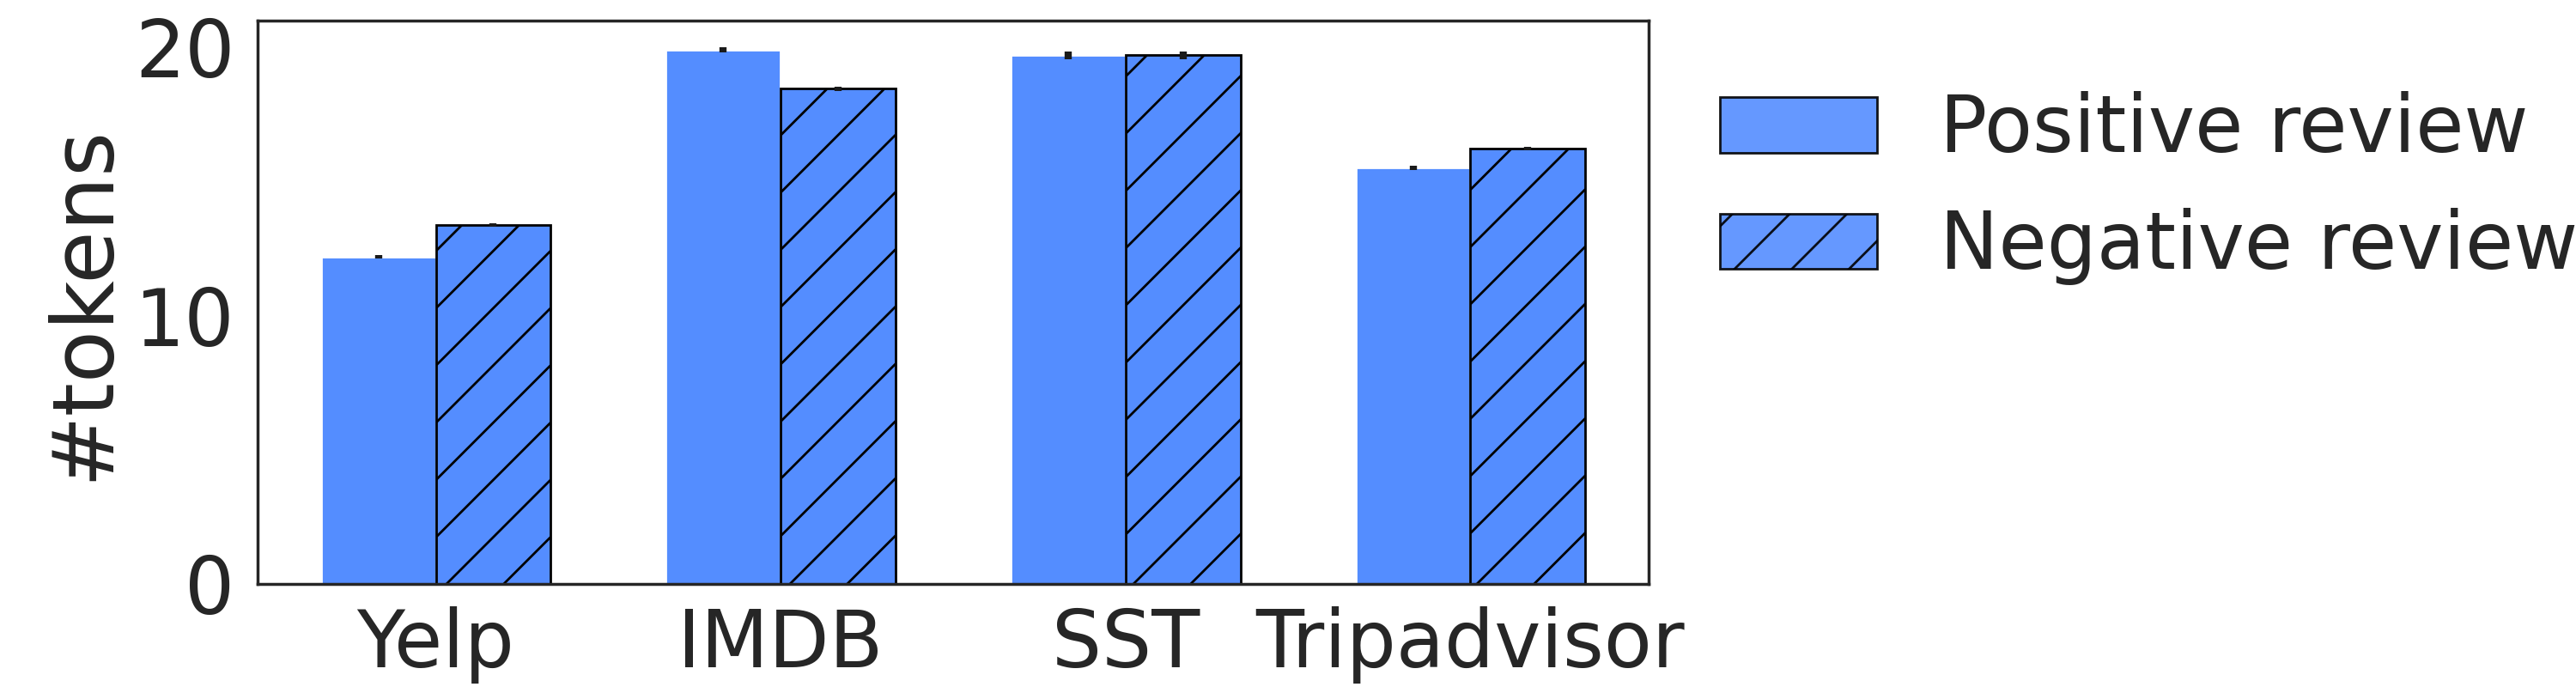

data_df           name      value  sem_value          category
4  IMDB         19.885488  0.093999   positive reviews
5  IMDB         18.443841  0.084844   negative reviews
0  SST          19.689963  0.137692   positive reviews
1  SST          19.688613  0.142586   negative reviews
6  Tripadvisor  15.495058  0.072362   positive reviews
7  Tripadvisor  16.210714  0.074441   negative reviews
2  Yelp         12.178076  0.058820   positive reviews
3  Yelp         13.367856  0.061318   negative reviews


In [129]:
seaborn_plot_util.draw_grouped_barplot(plot_data_non_amz, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+a_type+"_non_amz"),
                                       figsize=(15, 4), position=(0.1, 0.15, 0.54, 0.82),
#                                        ylim_top=ylim_top, 
                                       bbox_to_anchor=(1, 0.5, 0.2, 0.5))

In [5]:
from importlib import reload
reload(seaborn_plot_util)

/home/madhu/liwc_code/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<module 'seaborn_plot_util' from '/home/madhu/liwc_code/code/seaborn_plot_util.py'>

In [39]:
seed_val = 23
np.random.seed(seed_val)

preload_flag = True

plot_data = {
    "word_level": [],
#     "sent_level": [],
#     "review_level": []
}

saves_dir = os.path.join("../saves", "pos_neg")
Path(saves_dir).mkdir(parents=True, exist_ok=True)
plot_save_prefix = "vader_pos_neg_dist"

analysis_types = list(plot_data.keys())

if not preload_flag:
    vader_sentiment_scores = read_vader_sentiment_dict(VADER_LEXICON_PATH)
    datasets = json.loads(open("input.json").read())

    for data in datasets:
        myprint(data)                
        compute_vadersentiment_util(data["positive"], data["name"], vader_sentiment_scores, "positive", 
            plot_data, analysis_types)

        compute_vadersentiment_util(data["negative"], data["name"], vader_sentiment_scores, "negative", 
            plot_data, analysis_types)

        print()
        print()

    pickle.dump(plot_data, open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "wb"))
else:
    plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))


#     ylim_top =  max([float(d["value"]) for d in amazon_data])
#     ylim_top = 1.7*ylim_top
#     seaborn_plot_util.draw_grouped_barplot_four_subbars(amazon_data, "name", "value", 
#         "category", 
#         os.path.join(saves_dir, 
#         plot_save_prefix+"_"+str(analysis)+"_amz"),
#         ylim_top=ylim_top, amazon_data_flag=True)

'word_level'
../saves/pos_neg/vader_pos_neg_dist_word_level_non_amz
../saves/pos_neg/vader_pos_neg_dist_word_level_non_amz


<IPython.core.display.Javascript object>


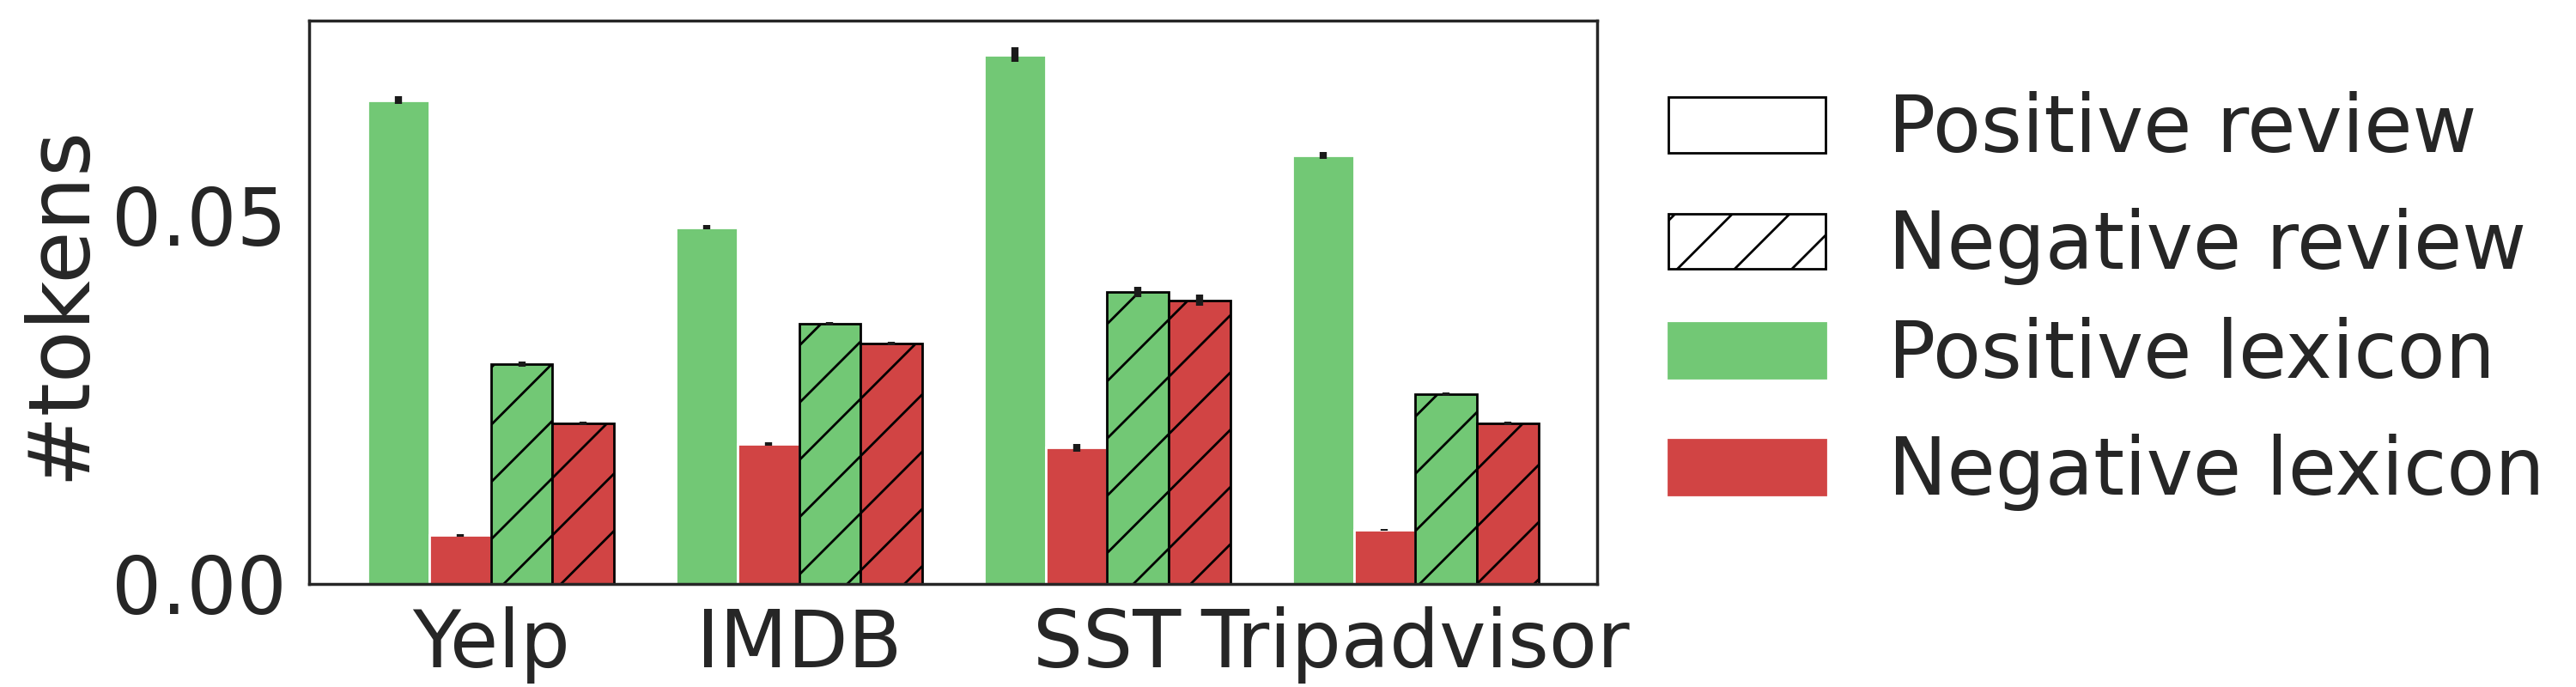

../saves/pos_neg/vader_pos_neg_dist_word_level_amz
../saves/pos_neg/vader_pos_neg_dist_word_level_amz


<IPython.core.display.Javascript object>


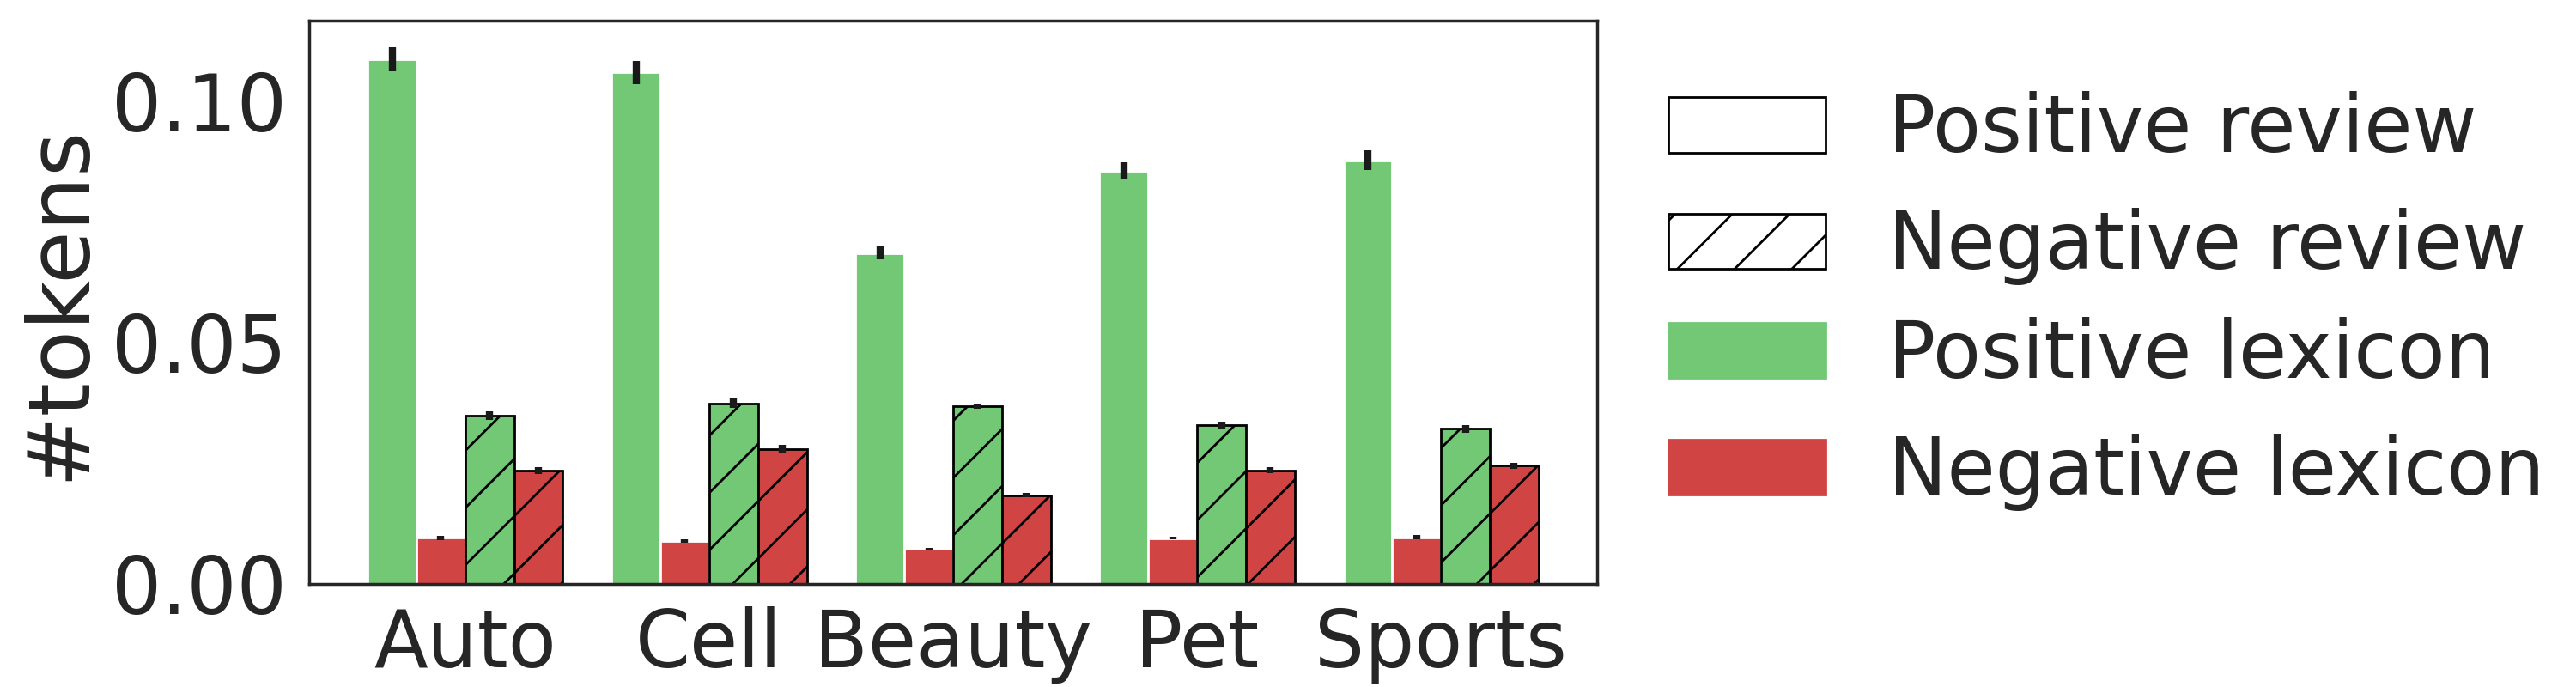

In [41]:

for analysis in analysis_types:   
    myprint(analysis)     
    amazon_data, non_amazon_data = util.filter_amazon(plot_data[analysis])
    # ylim_top = max(max([float(d["value"]) for d in amazon_data]), max([float(d["value"]) for d in non_amazon_data]))
#     ylim_top = max([float(d["value"]) for d in non_amazon_data])
#     ylim_top = 1.7*ylim_top
    reload(seaborn_plot_util)

    seaborn_plot_util.draw_grouped_barplot_four_subbars(non_amazon_data, "name", "value", 
            "category", 
            os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
            figsize=(15, 4), position=(0.12, 0.15, 0.5, 0.82),
        #   ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5))
    reload(seaborn_plot_util)

    seaborn_plot_util.draw_grouped_barplot_four_subbars(amazon_data, "name", "value", 
            "category", 
            os.path.join(saves_dir, 
            plot_save_prefix+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), position=(0.12, 0.15, 0.5, 0.82),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            amazon_data_flag=True)

../saves/pos_neg/vader_pos_neg_dist_sent_level_amz
../saves/pos_neg/vader_pos_neg_dist_sent_level_amz


/home/madhu/liwc_code/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


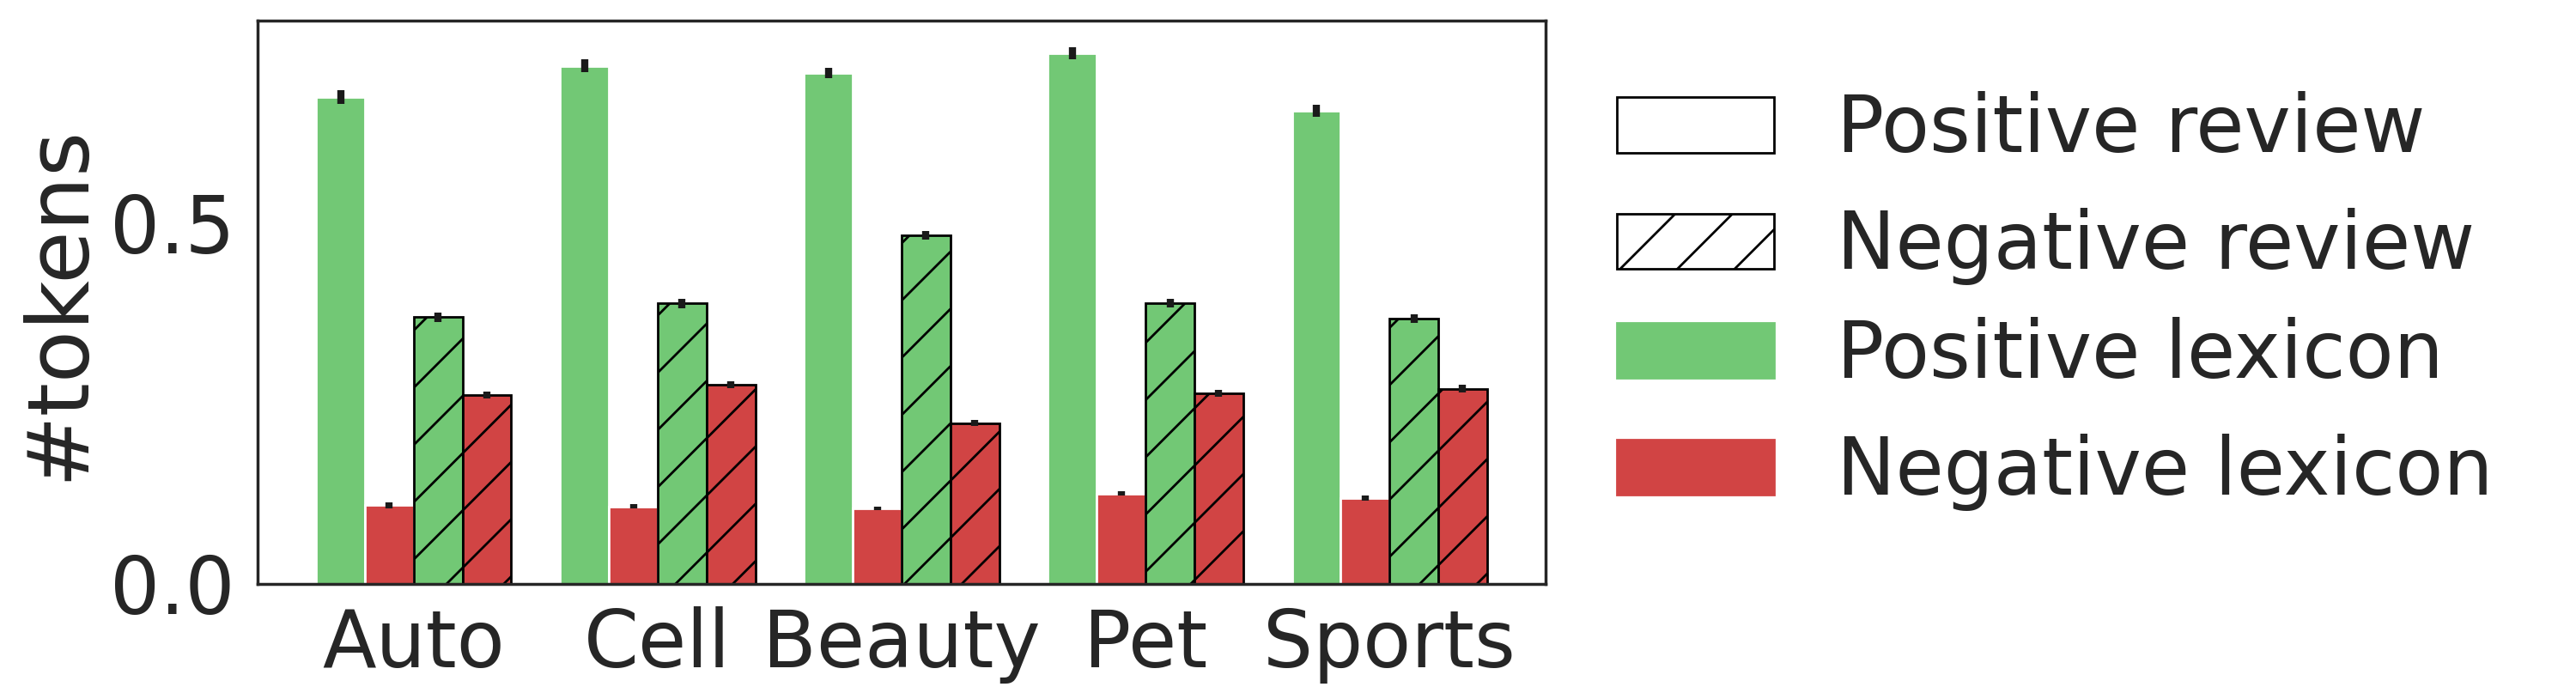

             name     value  sem_value text_sentiment review_category  \
8   Automotive     0.674486  0.009080   positive       positive         
9   Automotive     0.108985  0.003701   negative       positive         
10  Automotive     0.369566  0.006248   positive       negative         
11  Automotive     0.261738  0.005293   negative       negative         
0   Cellphones     0.717620  0.008877   positive       positive         
1   Cellphones     0.107645  0.003309   negative       positive         
2   Cellphones     0.388778  0.006498   positive       negative         
3   Cellphones     0.276227  0.005144   negative       negative         
12  Luxury Beauty  0.708054  0.006980   positive       positive         
13  Luxury Beauty  0.104648  0.002545   negative       positive         
14  Luxury Beauty  0.483610  0.005924   positive       negative         
15  Luxury Beauty  0.222969  0.003749   negative       negative         
4   Pet Supplies   0.735290  0.008029   positive   

In [31]:
reload(seaborn_plot_util)
# seaborn_plot_util.draw_grouped_barplot_four_subbars(non_amazon_data, "name", "value", 
#         "category", os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
#                                        figsize=(15, 4), position=(0.1, 0.15, 0.5, 0.82),
#                                        ylim_top=None, bbox_to_anchor=(1, 0.5, 0.2, 0.5))
# seaborn_plot_util.draw_grouped_barplot_four_subbars(amazon_data, "name", "value", 
#             "category", 
#             os.path.join(saves_dir, 
#             plot_save_prefix+"_"+str(analysis)+"_amz"),
#             figsize=(15, 4), position=(0.1, 0.15, 0.5, 0.82),
#             ylim_top=None, bbox_to_anchor=(1, 0.5, 0.2, 0.5),
#             amazon_data_flag=True)

In [56]:
    seed_val = 23
    np.random.seed(seed_val)

    preload_flag = True
    amazon_names = ['Pet Supplies', 'Luxury Beauty', 'Automotive', 'Cellphones', 'Sports']

    plot_data = {
        "word_level": [],
#         "sent_level": [],
#         "review_level": []
    }
    analysis_types = list(plot_data.keys())

    saves_dir = os.path.join("../saves", "pos_neg_negation")
    Path(saves_dir).mkdir(parents=True, exist_ok=True)
    plot_save_prefix = "vader_pos_neg_negation_dist"

    if not preload_flag:
        vader_sentiment_scores = read_vader_sentiment_dict(VADER_LEXICON_PATH)
        datasets = json.loads(open("input.json", "r").read())

        for data in datasets:
            myprint(data)        
            compute_vadersentiment_util(data["positive"], data["name"], vader_sentiment_scores, "positive", 
                plot_data, analysis_types)

            compute_vadersentiment_util(data["negative"], data["name"], vader_sentiment_scores, "negative", 
                plot_data, analysis_types)

            print()
            print()

        # pickle.dump({
        #     "plot_data_word_level": plot_data_word_level,
        #     "plot_data_sent_level": plot_data_sent_level,
        #     "plot_data_review_level": plot_data_review_level
        # }, open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "wb"))
        pickle.dump(plot_data, open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "wb"))
    else:
        # temp_json = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))
        # plot_data_word_level = temp_json["plot_data_word_level"]
        # plot_data_sent_level = temp_json["plot_data_sent_level"]
        # plot_data_review_level = temp_json["plot_data_review_level"]
        plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))

    



'word_level'
../saves/pos_neg_negation/vader_pos_neg_negation_dist_word_level_non_amz
../saves/pos_neg_negation/vader_pos_neg_negation_dist_word_level_non_amz


<IPython.core.display.Javascript object>


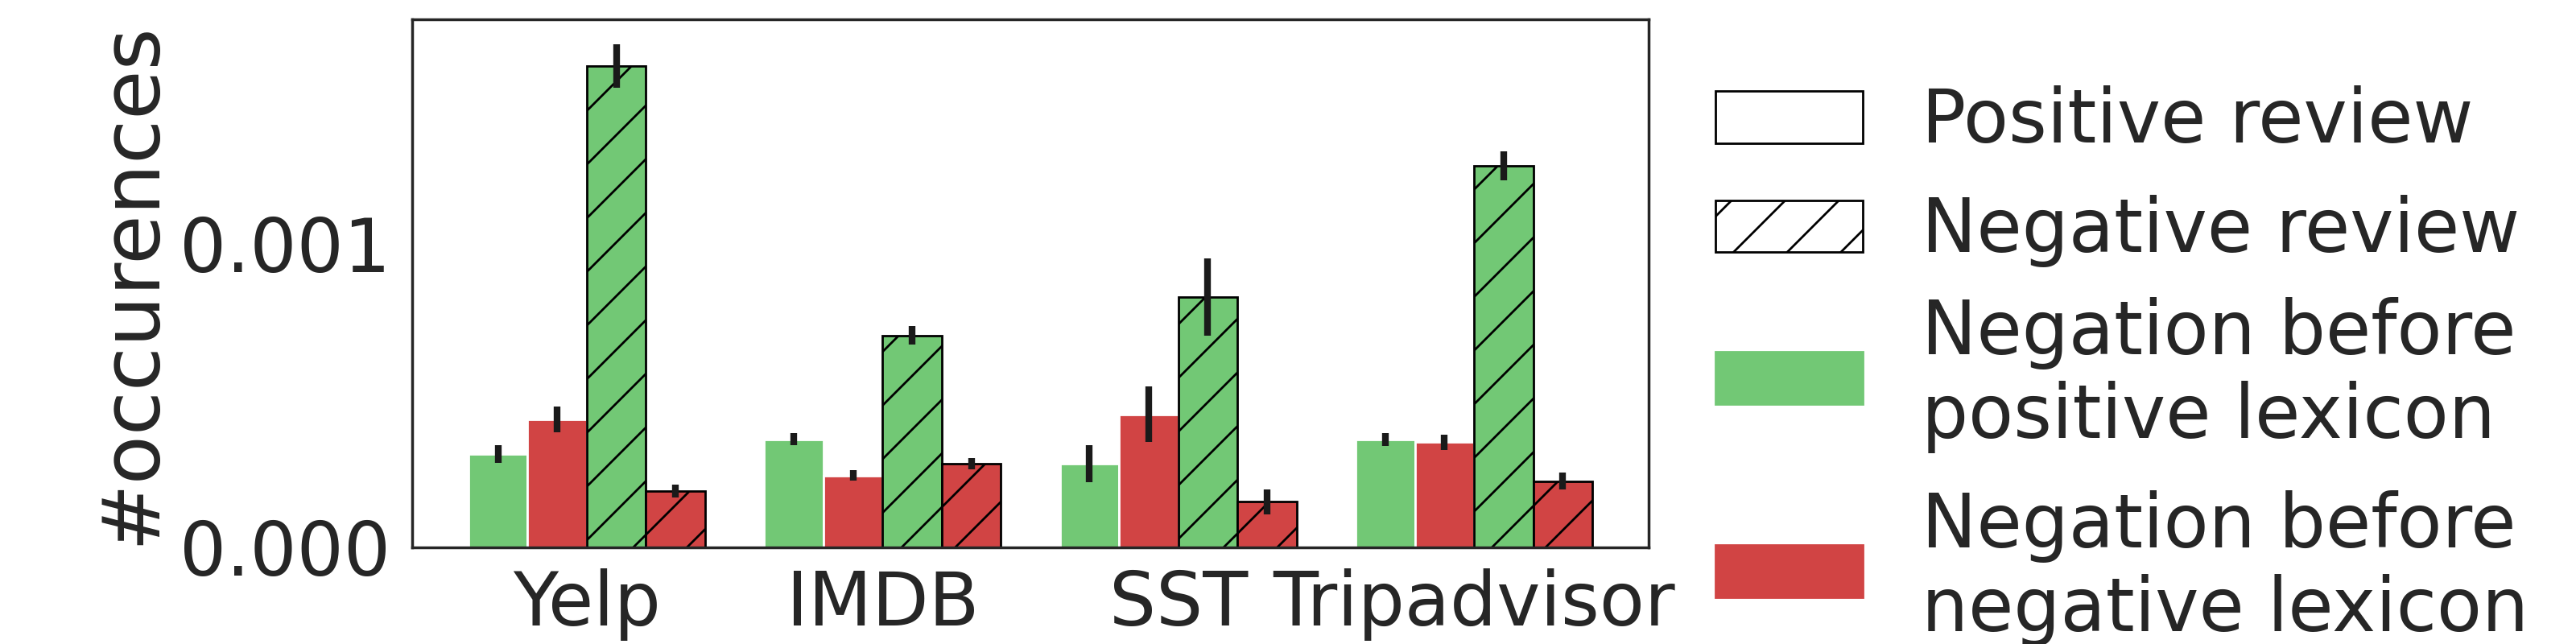

../saves/pos_neg_negation/vader_pos_neg_negation_dist_word_level_amz
../saves/pos_neg_negation/vader_pos_neg_negation_dist_word_level_amz


<IPython.core.display.Javascript object>


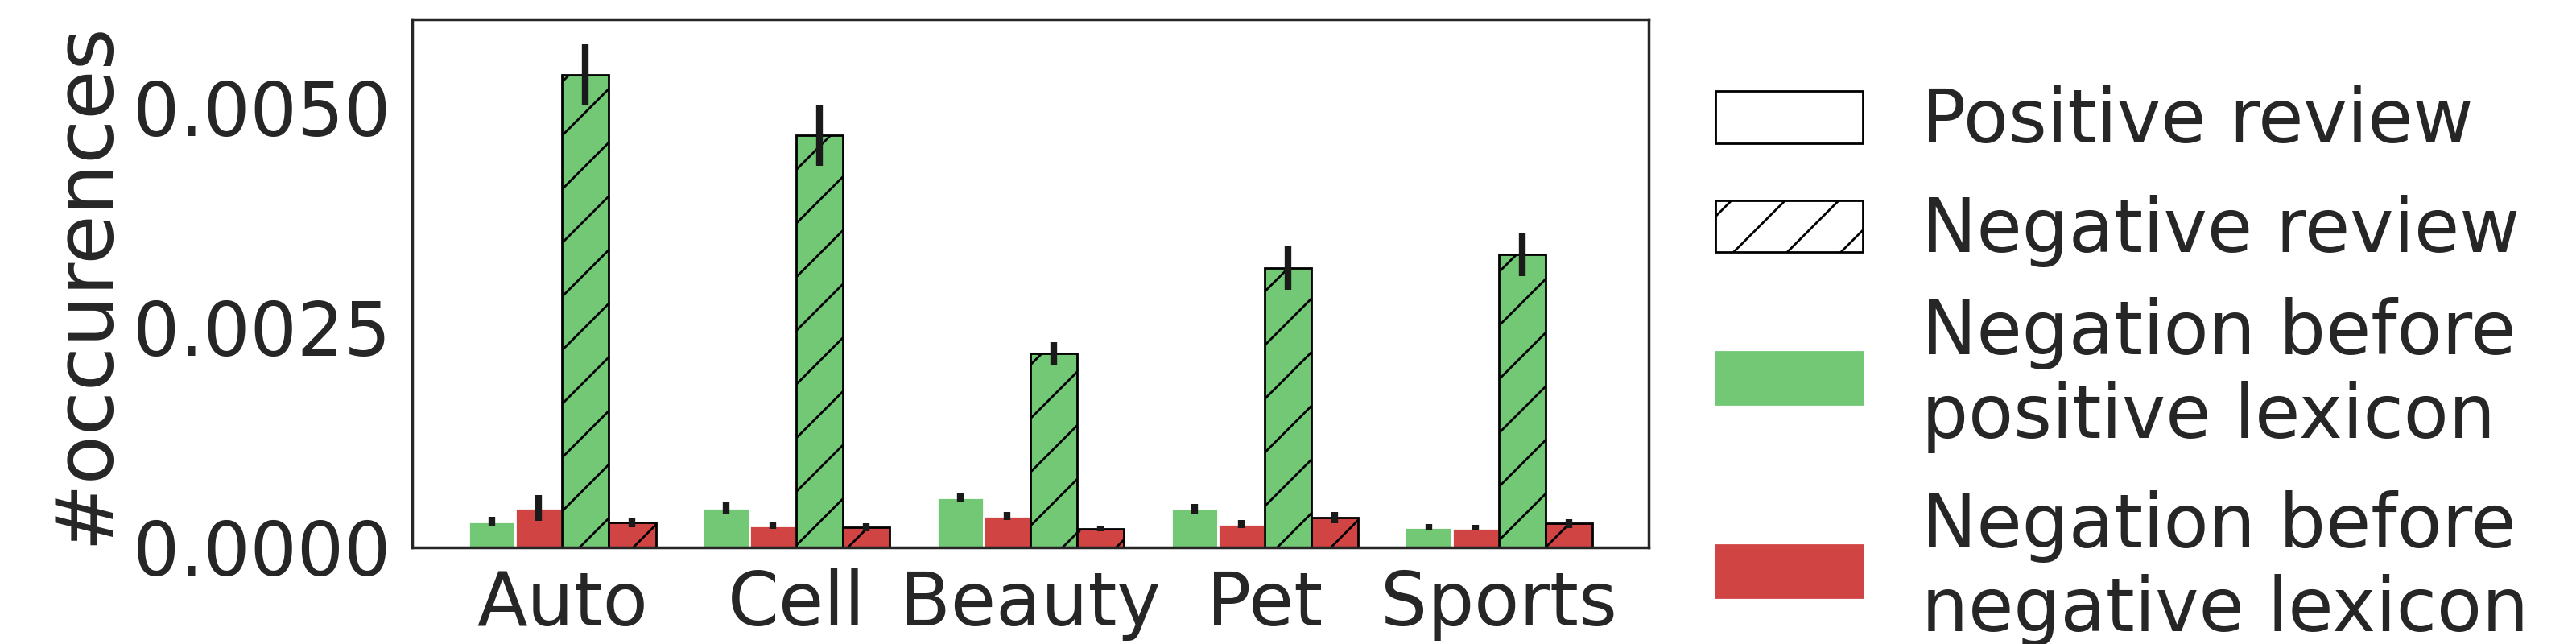

In [63]:

reload(seaborn_plot_util)
for analysis in analysis_types:   
        myprint(analysis)     
        amazon_data, non_amazon_data = util.filter_amazon(plot_data[analysis])
        # ylim_top = max(max([float(d["value"]) for d in amazon_data]), max([float(d["value"]) for d in non_amazon_data]))
#         ylim_top = max([float(d["value"]) for d in non_amazon_data])
#         ylim_top = 1.8*ylim_top
        
        seaborn_plot_util.draw_grouped_barplot_four_subbars(non_amazon_data, "name", "value", 
            "category", 
            os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
            figsize=(16, 4), position=(0.16, 0.15, 0.48, 0.82),
        #   ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            y_axis_name="#occurences",
            negation=True)

        seaborn_plot_util.draw_grouped_barplot_four_subbars(amazon_data, "name", "value", 
                "category", 
                os.path.join(saves_dir, 
                plot_save_prefix+"_"+str(analysis)+"_amz"),
                figsize=(16, 4), position=(0.16, 0.15, 0.48, 0.82),
    #             ylim_top=None, 
                bbox_to_anchor=(1, 0.5, 0.2, 0.5),
                amazon_data_flag=True,
                y_axis_name="#occurences",
                negation=True)

#         seaborn_plot_util.draw_grouped_barplot_four_subbars(non_amazon_data, "name", "value", 
#             "category", 
#             os.path.join(saves_dir, 
#             plot_save_prefix+"_"+str(analysis)+"_non_amz"),
#             ylim_top=ylim_top,
#             y_axis_name="\#occurences",
#             negation=True)


../saves/pos_neg_negation/vader_pos_neg_negation_dist_sent_level_non_amz
../saves/pos_neg_negation/vader_pos_neg_negation_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


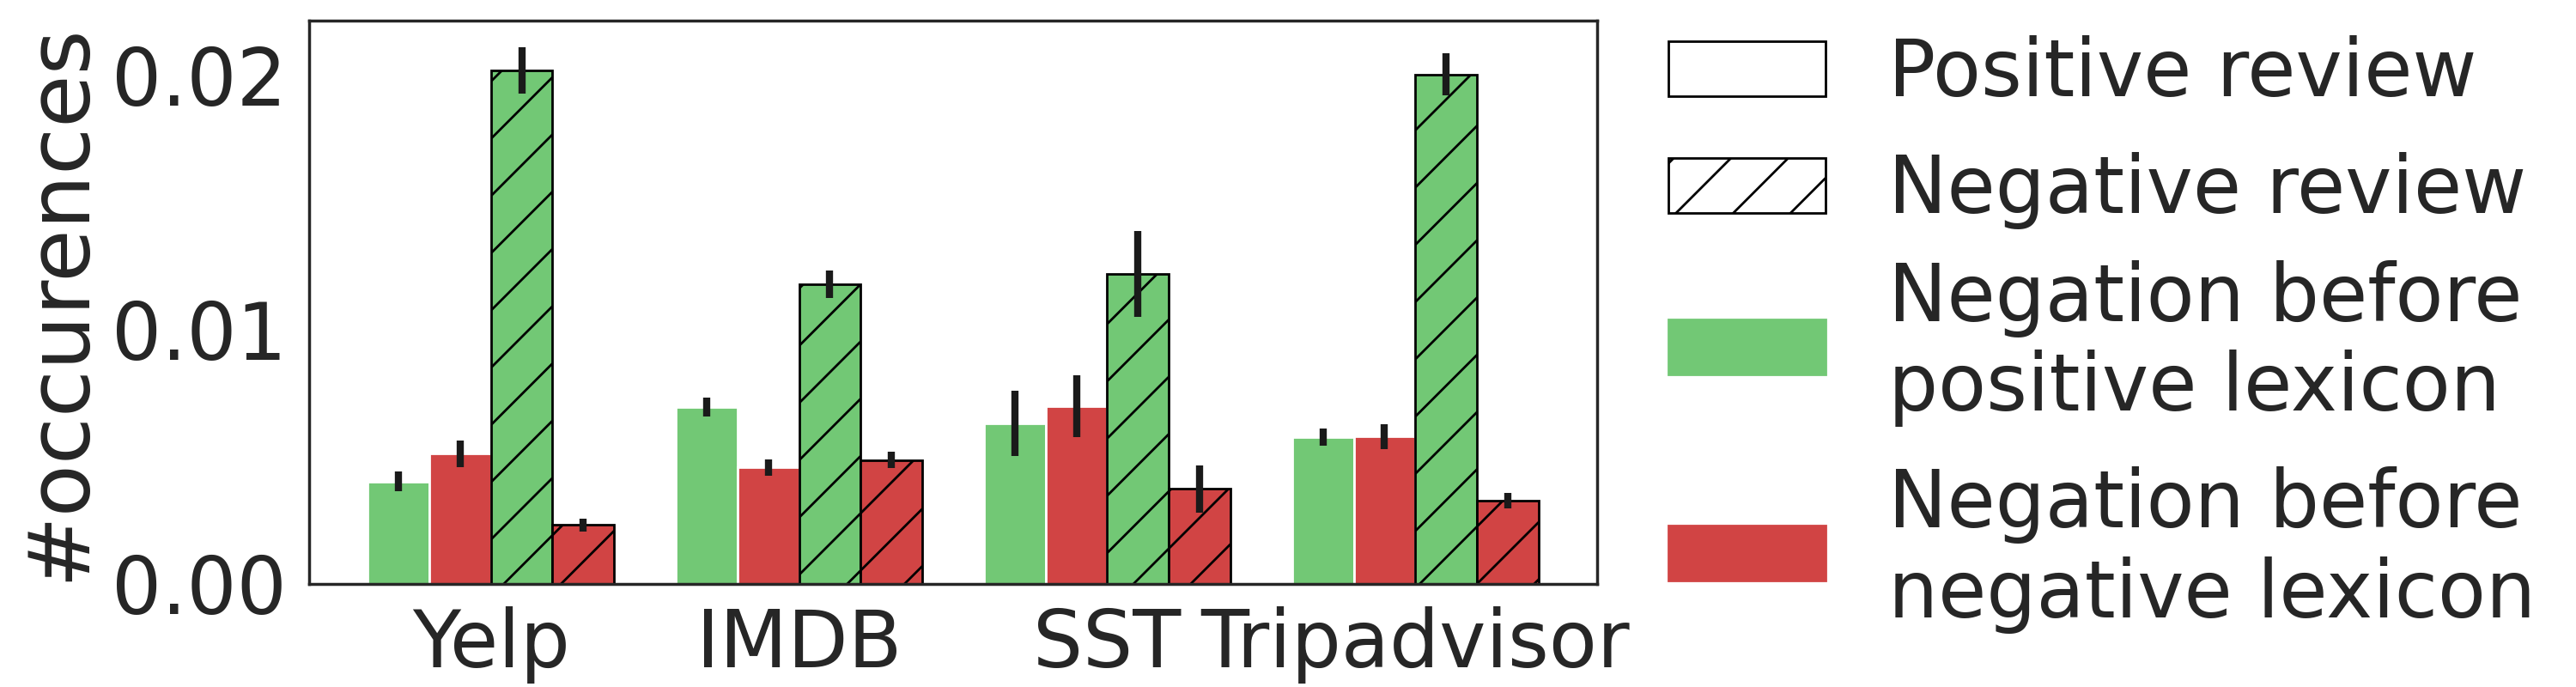

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [6]:
reload(seaborn_plot_util)
seaborn_plot_util.draw_grouped_barplot_four_subbars(non_amazon_data, "name", "value", 
            "category", 
            os.path.join(saves_dir, 
            plot_save_prefix+"_"+str(analysis)+"_non_amz"),
            y_axis_name="#occurences",
            negation=True,
figsize=(15, 4), position=(0.12, 0.15, 0.5, 0.82),
                                       ylim_top=None, bbox_to_anchor=(1, 0.5, 0.2, 0.6))

In [30]:
    seed_val = 23
    np.random.seed(seed_val)
    preload_flag = True

    saves_dir = os.path.join("../saves", "negation")
    Path(saves_dir).mkdir(parents=True, exist_ok=True)   
    plot_save_prefix = "vader_negation_only_dist"
    
    seed_vals = [23]
    plot_data = {
        # "word_level": [],
        "sent_level": [],
        # "review_level": []
    }
    analysis_types = list(plot_data.keys())

    if not preload_flag:            
        dataset_files = json.loads(open("input.json").read())

        for data_file in dataset_files:
            for seed_val in seed_vals:
                myprint(f"Dataset: {data_file}")
                myprint(f"Seed val: {seed_val}")

                compute_negation_util(data_file["positive"], data_file["name"], seed_val, plot_data, 
                    "positive", analysis_types)
                compute_negation_util(data_file["negative"], data_file["name"], seed_val, plot_data, 
                    "negative", analysis_types)
                
                print()
                print()
        pickle.dump(plot_data, open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "wb"))        
    else:
        plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))
    for analysis in analysis_types:
        amazon_data, non_amazon_data = util.filter_amazon(plot_data[analysis])
        # ylim_top = max(max([float(d["value"]) for d in amazon_data]), max([float(d["value"]) for d in non_amazon_data]))
        # ylim_top = 1.2*ylim_top

        ylim_top = max([float(d["value"]) for d in amazon_data])
        ylim_top = 1.7*ylim_top
        



../saves/negation/vader_negation_only_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


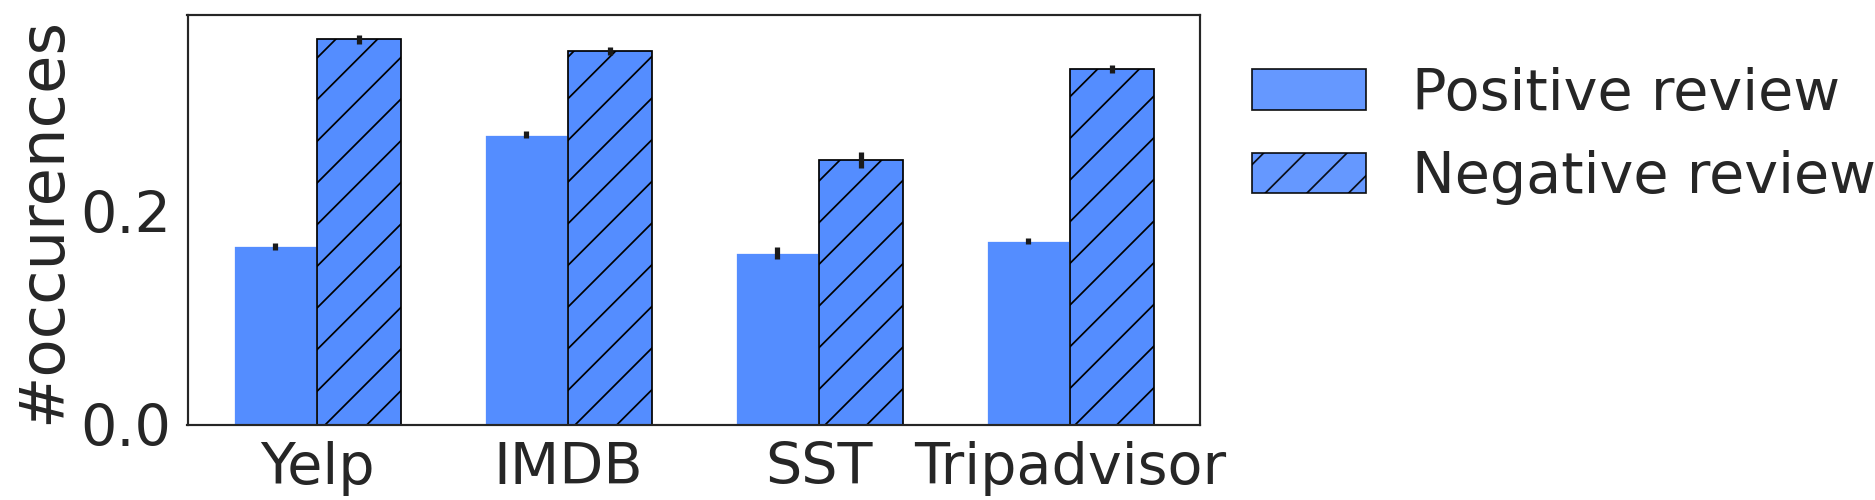

          name     value  sem_value  category
0  SST          0.160950  0.005677   positive
1  SST          0.247569  0.007264   negative
2  Yelp         0.166931  0.003303   positive
3  Yelp         0.360794  0.004316   negative
4  IMDB         0.271338  0.003314   positive
5  IMDB         0.349667  0.003602   negative
6  Tripadvisor  0.172165  0.002814   positive
7  Tripadvisor  0.332708  0.003585   negative


In [32]:

        ylim_top = max([float(d["value"]) for d in non_amazon_data])
        ylim_top = 1.7*ylim_top
        seaborn_plot_util.draw_grouped_barplot(non_amazon_data, "name", "value", 
            "category", os.path.join(saves_dir, plot_save_prefix+"_"+str(analysis)+"_non_amz"),
            y_axis_name="#occurences",
                                                                                     figsize=(15, 4), position=(0.1, 0.15, 0.54, 0.82),
                                       ylim_top=None, bbox_to_anchor=(1, 0.5, 0.2, 0.5))
